<img src="pneumatic model.png">

In [139]:
import sympy as sym
from sympy import init_session
init_session()

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



eqn 1:


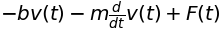

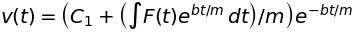

In [192]:
'''Simple Model
inifinte tank --> p & F constant
turf doesn't exist
'''
v, F = symbols('v F', cls=Function)
#Apply Newtons law to the mass
m = symbols('m')
b = symbols('b')

print('eqn 1:')
eqn1 = F(t) - b*v(t) - Derivative(v(t),t)*m
display(eqn1)
sym.dsolve(eqn1, v(t))

In [141]:
# '''solve numerically
# '''
# import numpy as np
# from scipy.integrate import odeint
# y = sym.symbols('y', cls = Function)
# b = 1.0
# m = 5.0
# F = 10.0

# def model(y,t,b):
#     dvdt = -(-F + b*y)/m
#     return dvdt

# vo = 0.0
# t = np.linspace(0,10,1000)
# y = odeint(model,vo,t,(m,))

# plt.plot(t,y)
# plt.show()

ideal gas law


adiabatic constant


3392920.065876977 <Unit('force_pound * inch')>

eqn 2:


eqn 3:


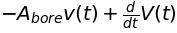

eqn 4:


In [184]:
'''in actuality the volume of the tank will effect the dynamics
assume constant temp
'''
from pint import UnitRegistry
ureg = UnitRegistry()

n,r,T = sym.symbols('n, r, T')
V, P = sym.symbols('V, P', cls=Function)
print("ideal gas law")
display(P(t)*V(t) -n*r*T)

#calculate the adiabatic constant
D_tank = 2.5*12
L_tank = 4*12
V_tank = D_tank**2*np.pi/4*L_tank*ureg.inch**3
V_tank.to(ureg.meter**3)
P_tank = 100*ureg.lbf/ureg.inch**2
P_tank.to(ureg.newton/ureg.meter**2)

K_tank = P_tank*V_tank
print("adiabatic constant")
display(K_tank)
K_adiabatic = sym.symbols('K_adiabatic')
print('eqn 2:')
display(P(t)*V(t)-K_adiabatic)

#Actuator volume
D_bore = sym.symbols('D_bore')
A_bore = sym.symbols('A_bore')
# A_bore = D_bore**2*k #k is a placeholder to get area
print('eqn 3:')
display(Derivative(V(t),t) - v(t)*A_bore)

#Actuator force
print('eqn 4:')
F(t) - P(t)*A_bore

eqn 5:


eqn 6:


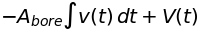

eqn 7:


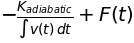

eqn 8:


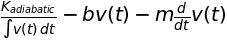

eqn 8:


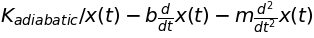

In [208]:
'''we want F(t) in our original equation to be in terms of v(t)'''

-A_bore*Integral(v(t),t)+V(t)

#sub 2 into 4"
print('eqn 5:')
display(-A_bore*K_adiabatic/V(t)+F(t))

#integrate 3
print('eqn 6:')
display(-A_bore*Integral(v(t),t)+V(t))

#sub 6 into 5
print('eqn 7:')
display(-A_bore*K_adiabatic/(A_bore*Integral(v(t),t)) + F(t))
# eqn2 = A_bore*P(t) - b*v(t) - Derivative(v(t),t)*m
# display(eqn2)

#sub 7 into 1
print('eqn 8:')
display(K_adiabatic/Integral(v(t),t) - b*v(t) - Derivative(v(t),t)*m)

#write in terms of x(t)
x = symbols('x', cls=Function)
print('eqn 8:')
eqn8 = (K_adiabatic/x(t) - b*Derivative(x(t),t) - Derivative(x(t),t,t)*m)
display(eqn8)